In [1]:
import tensorflow as tf
import numpy as np

import cv2
import IPython.display as display
import PIL.Image

from tensorflow import keras

%load_ext autoreload
%autoreload 2

In [ ]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

## Optimize activations

In [2]:
# load model
model = keras.models.load_model("data/cifar10_cnn_no_bn.hdf5")
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        3692

In [13]:
# define optimizator
from optimizators import ActivationOptimizer

ao = ActivationOptimizer(
    model=model,
    layer_name="dense_19",
    activation_index=(9),#(slice(None), slice(None), 15),
    steps=5000,
    step_size=0.001,
    reg_coef=0.3
)

In [14]:
# optimize
random_image = tf.random.uniform(
    [32, 32, 3],
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None,
)

loss, image_raw = ao(random_image)
print(loss.numpy())

Tracing
363.43335


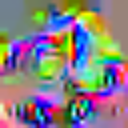

In [15]:
image = 255 * (image_raw)
image = tf.cast(image, tf.uint8)
image = np.array(image)
# resize
image = cv2.resize(image, (128, 128))
PIL.Image.fromarray(image)

### Analize all layers